In [1]:
from biocypher import BioCypher, Resource
from collectri.adapters.collectri_adapter import CollectriAdapter

INFO -- This is BioCypher v0.5.42.
INFO -- Logging into `biocypher-log/biocypher-20240601-142004.log`.


## 1. Load the data

In [2]:
# ----------------------
# Setup: Should optional steps be run?
# ----------------------

RUN_OPTIONAL_STEPS = True

In [3]:
# ----------------------
# Step 1: Data download and cache
# ----------------------

bc = BioCypher()
collectri = Resource(
    name="collectri",
    url_s="https://rescued.omnipathdb.org/CollecTRI.csv",
    lifetime=0,  # CollecTRI is a static resource
)
paths = bc.download(collectri)

INFO -- Running BioCypher with schema configuration from config/schema_config.yaml.
INFO -- Loading cache file .cache/cache.json.
INFO -- Asking for download of collectri.
100%|██████████████████████████████████████| 2.58M/2.58M [00:00<00:00, 996MB/s]
SHA256 hash of downloaded file: 86c90b30f2cc75c189da1f0a8c353d1547287cd656a9fac1c678634285bcb4e0
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [4]:
# ----------------------
# Optional: Inspect data
# ----------------------

if RUN_OPTIONAL_STEPS:
    import pandas as pd

    df = pd.read_csv(paths[0])
    print(df.head())
    print(df.columns)

  source target  weight TF.category  \
0    MYC   TERT       1        dbTF   
1   SPI1  BGLAP       1        dbTF   
2    AP1    JUN       1        dbTF   
3  SMAD3    JUN       1        dbTF   
4  SMAD4    JUN       1        dbTF   

                                           resources  \
0  ExTRI;HTRI;TRRUST;TFactS;NTNU.Curated;Pavlidis...   
1                                              ExTRI   
2                          ExTRI;TRRUST;NTNU.Curated   
3                   ExTRI;TRRUST;TFactS;NTNU.Curated   
4                   ExTRI;TRRUST;TFactS;NTNU.Curated   

                                                PMID       sign.decision  
0  10022128;10491298;10606235;10637317;10723141;1...                PMID  
1                                           10022617  default activation  
2  10022869;10037172;10208431;10366004;11281649;1...                PMID  
3                                  10022869;12374795                PMID  
4                                  10022869;12374795 

In [5]:
# ----------------------
# Step 2: Load and configure adapter
# ----------------------

adapter = CollectriAdapter(paths[0])

# ----------------------
# Optional: For prototyping, we can use the Pandas functionality
# ----------------------

if RUN_OPTIONAL_STEPS:
    bc.add(adapter.get_nodes())
    bc.add(adapter.get_edges())
    dfs = bc.to_df()
    for name, df in dfs.items():
        print(name)
        print(df.head())

    bc = BioCypher()
    # Reset BioCypher, otherwise we would deduplicate all entities from previous
    # run. This is not needed if this optional step is skipped/removed.

INFO -- Preprocessing data.
INFO -- Loading ontologies...
INFO -- Instantiating OntologyAdapter class for https://github.com/biolink/biolink-model/raw/v3.2.1/biolink-model.owl.ttl.
INFO -- Generating nodes.
WARNING -- Duplicate node type transcription factor found. 
INFO -- Generating edges.
INFO -- Running BioCypher with schema configuration from config/schema_config.yaml.


gene
             node_id node_label   name                 id preferred_id
0   hgnc.symbol:TERT       gene   TERT   hgnc.symbol:TERT           id
1  hgnc.symbol:BGLAP       gene  BGLAP  hgnc.symbol:BGLAP           id
2    hgnc.symbol:JUN       gene    JUN    hgnc.symbol:JUN           id
3    hgnc.symbol:IL2       gene    IL2    hgnc.symbol:IL2           id
4    hgnc.symbol:FAS       gene    FAS    hgnc.symbol:FAS           id
transcription factor
              node_id            node_label    name     category  \
0     hgnc.symbol:AP1  transcription factor     AP1  DNA-binding   
1  hgnc.symbol:NFE2L3  transcription factor  NFE2L3  DNA-binding   
2    hgnc.symbol:NFKB  transcription factor    NFKB  DNA-binding   
3    hgnc.symbol:CARF  transcription factor    CARF  DNA-binding   
4    hgnc.symbol:KAT7  transcription factor    KAT7  DNA-binding   

                   id preferred_id  
0     hgnc.symbol:AP1           id  
1  hgnc.symbol:NFE2L3           id  
2    hgnc.symbol:NFKB       

## 2. Get to know the data

In [6]:
dfs.keys()

dict_keys(['gene', 'transcription factor', 'transcriptional regulation'])

In [7]:
dfs["gene"]

,node_id,node_label,name,id,preferred_id
0,hgnc.symbol:TERT,gene,TERT,hgnc.symbol:TERT,id
1,hgnc.symbol:BGLAP,gene,BGLAP,hgnc.symbol:BGLAP,id
2,hgnc.symbol:JUN,gene,JUN,hgnc.symbol:JUN,id
3,hgnc.symbol:IL2,gene,IL2,hgnc.symbol:IL2,id
4,hgnc.symbol:FAS,gene,FAS,hgnc.symbol:FAS,id
...,...,...,...,...,...
6833,hgnc.symbol:SERF2,gene,SERF2,hgnc.symbol:SERF2,id
6834,hgnc.symbol:SCGB2A1,gene,SCGB2A1,hgnc.symbol:SCGB2A1,id
6835,hgnc.symbol:LCP2,gene,LCP2,hgnc.symbol:LCP2,id
6836,hgnc.symbol:PRR5L,gene,PRR5L,hgnc.symbol:PRR5L,id


In [138]:
dfs["transcription factor"]

,node_label,name,category,id,preferred_id
node_id,,,,,
hgnc.symbol:AP1,transcription factor,AP1,DNA-binding,hgnc.symbol:AP1,id
hgnc.symbol:NFE2L3,transcription factor,NFE2L3,DNA-binding,hgnc.symbol:NFE2L3,id
hgnc.symbol:NFKB,transcription factor,NFKB,DNA-binding,hgnc.symbol:NFKB,id
hgnc.symbol:CARF,transcription factor,CARF,DNA-binding,hgnc.symbol:CARF,id
hgnc.symbol:KAT7,transcription factor,KAT7,DNA-binding,hgnc.symbol:KAT7,id
...,...,...,...,...,...
hgnc.symbol:ZSCAN21,transcription factor,ZSCAN21,DNA-binding,hgnc.symbol:ZSCAN21,id
hgnc.symbol:RYBP,transcription factor,RYBP,co-regulatory,hgnc.symbol:RYBP,id
hgnc.symbol:TRIM24,transcription factor,TRIM24,co-regulatory,hgnc.symbol:TRIM24,id


In [9]:
# Check if all items in list(dfs["transcriptional regulation"]["target_id"]) are part of dfs["transcription factor"]["node_id"]
all(
    dfs["transcriptional regulation"]["target_id"].isin(dfs["gene"]["node_id"])
)

True

In [10]:
all(
    dfs["transcriptional regulation"]["target_id"].isin(dfs["transcription factor"]["node_id"])
)

False

In [11]:
all(
    dfs["transcriptional regulation"]["source_id"].isin(dfs["gene"]["node_id"])
)

False

In [12]:
dfs["transcriptional regulation"]["source_id"].isin(dfs["transcription factor"]["node_id"]).value_counts()

source_id
False    40522
True      3014
Name: count, dtype: int64

In [140]:
dfs["transcriptional regulation"]

,relationship_id,source_id,target_id,relationship_label,activation_or_inhibition,resources,references,sign_decision
0,8dc30196226d1dfb959f4988d8a658fc,hgnc.symbol:MYC,hgnc.symbol:TERT,transcriptional regulation,activation,ExTRI;HTRI;TRRUST;TFactS;NTNU.Curated;Pavlidis...,10022128;10491298;10606235;10637317;10723141;1...,PMID
1,00fd69635655b1b187471df9c77a926d,hgnc.symbol:SPI1,hgnc.symbol:BGLAP,transcriptional regulation,activation,ExTRI,10022617,default activation
2,9b37555ec97aa56af2a934ebcd924fa7,hgnc.symbol:AP1,hgnc.symbol:JUN,transcriptional regulation,activation,ExTRI;TRRUST;NTNU.Curated,10022869;10037172;10208431;10366004;11281649;1...,PMID
3,210aaba9899cfb4039c6c766fa989a0f,hgnc.symbol:SMAD3,hgnc.symbol:JUN,transcriptional regulation,activation,ExTRI;TRRUST;TFactS;NTNU.Curated,10022869;12374795,PMID
4,b5623638744f345dd3b761af5ff7e3f3,hgnc.symbol:SMAD4,hgnc.symbol:JUN,transcriptional regulation,activation,ExTRI;TRRUST;TFactS;NTNU.Curated,10022869;12374795,PMID
...,...,...,...,...,...,...,...,...
43531,1c409356d62c61874f1237330a2042d8,hgnc.symbol:RUNX1,hgnc.symbol:LCP2,transcriptional regulation,activation,DoRothEA_A,20019798,default activation
43532,1b145e69c23d3bcbe5304e4f7d3a1d3f,hgnc.symbol:RUNX1,hgnc.symbol:PRR5L,transcriptional regulation,activation,DoRothEA_A,20019798,default activation
43533,d27ff2d0a72c9bba4b5d283ee03a9107,hgnc.symbol:TWIST1,hgnc.symbol:GLI1,transcriptional regulation,activation,DoRothEA_A,11948912,default activation
43534,5fd615bfb0243e7864df711928d645b2,hgnc.symbol:USF1,hgnc.symbol:NUP188,transcriptional regulation,activation,DoRothEA_A,22951020,PMID


In [15]:
dfs["transcriptional regulation"]["sign_decision"].value_counts()

sign_decision
default activation    21995
PMID                  19616
regulon                1925
Name: count, dtype: int64

## 3. Create a PyG HeteroData object from the BioCypher KG

In [16]:
import os.path as osp

import pandas as pd
import torch
from sentence_transformers import SentenceTransformer

from torch_geometric.data import HeteroData, download_url, extract_zip
from torch_geometric.transforms import RandomLinkSplit, ToUndirected

In [17]:
def load_node_csv(path, index_col, encoders=None, **kwargs):
    df = path # pd.read_csv(path, index_col=index_col, **kwargs)
    print(df.columns)
    df.set_index(index_col, inplace=True)
    mapping = {index: i for i, index in enumerate(df.index.unique())}

    x = None
    if encoders is not None:
        xs = [encoder(df[col]) for col, encoder in encoders.items()]
        x = torch.cat(xs, dim=-1)

    return x, mapping


def load_edge_csv(path, src_index_col, src_mapping, dst_index_col, dst_mapping,
                  encoders=None, **kwargs):
    df = path # pd.read_csv(path, **kwargs)

    src = [src_mapping[index] for index in df[src_index_col]]
    dst = [dst_mapping[index] for index in df[dst_index_col]]
    edge_index = torch.tensor([src, dst])

    edge_attr = None
    if encoders is not None:
        edge_attrs = [encoder(df[col]) for col, encoder in encoders.items()]
        edge_attr = torch.cat(edge_attrs, dim=-1)

    return edge_index, edge_attr

In [18]:
class SequenceEncoder:
    # The 'SequenceEncoder' encodes raw column strings into embeddings.
    def __init__(self, model_name='all-MiniLM-L6-v2', device=None):
        self.device = device
        self.model = SentenceTransformer(model_name, device=device)

    @torch.no_grad()
    def __call__(self, df):
        x = self.model.encode(df.values, show_progress_bar=True,
                              convert_to_tensor=True, device=self.device)
        return x.cpu()


class GenresEncoder:
    # The 'GenreEncoder' splits the raw column strings by 'sep' and converts
    # individual elements to categorical labels.
    def __init__(self, sep='|'):
        self.sep = sep

    def __call__(self, df):
        genres = set(g for col in df.values for g in col.split(self.sep))
        mapping = {genre: i for i, genre in enumerate(genres)}

        x = torch.zeros(len(df), len(mapping))
        for i, col in enumerate(df.values):
            for genre in col.split(self.sep):
                x[i, mapping[genre]] = 1
        return x


class IdentityEncoder:
    # The 'IdentityEncoder' takes the raw column values and converts them to
    # PyTorch tensors.
    def __init__(self, dtype=None):
        self.dtype = dtype

    def __call__(self, df):
        return torch.from_numpy(df.values).view(-1, 1).to(self.dtype)

class BinaryEncoder: # TODO: better name and generalizable
    # The 'IdentityEncoder' takes the raw column values and converts them to
    # PyTorch tensors.
    def __init__(self, dtype=None):
        self.dtype = dtype

    def __call__(self, df):
        #rename activation to 1 and inhibition to -1 in df
        df = df.replace("activation", 1)
        df = df.replace("inhibition", -1)
        return torch.from_numpy(df.values).view(-1, 1).to(self.dtype)

In [19]:
from torch_geometric.data import HeteroData

data = HeteroData()

In [20]:
nodes = ["gene", "transcription factor"]
all_nodes_mapping = {}

for node in nodes:
    node_features_x, node_mapping = load_node_csv(dfs[node], index_col='node_id')
    data[node].x = node_features_x
    data[node].num_nodes = len(node_mapping)
    all_nodes_mapping.update(node_mapping)

Index(['node_id', 'node_label', 'name', 'id', 'preferred_id'], dtype='object')
Index(['node_id', 'node_label', 'name', 'category', 'id', 'preferred_id'], dtype='object')


In [21]:
data

HeteroData(
  gene={ num_nodes=6838 },
  transcription factor={ num_nodes=267 }
)

In [67]:
all_nodes_mapping

7105

In [23]:
edges = ["transcriptional regulation"]

for edge in edges:
    edge_index, edge_label = load_edge_csv(
        dfs[edge],
        src_index_col='source_id',
        src_mapping=all_nodes_mapping,
        dst_index_col='target_id',
        dst_mapping=all_nodes_mapping,
        encoders={'activation_or_inhibition': BinaryEncoder(dtype=torch.long)},
    )
    tf_to_gene_mask = dfs["transcriptional regulation"]["source_id"].isin(dfs["transcription factor"].index) #["node_id"])
    
    #print(tf_to_gene_mask.size())
    print(edge_index.size())
    #print(edge_index[:, tf_to_gene_mask].size())
    #print(edge_index[:, ~tf_to_gene_mask].size())
    print(edge_label.size())
    print(edge_label[tf_to_gene_mask].reshape(-1).size())

    # in case of edge prediction we need to set the edge_label
    # TODO: also set edge_attr based on edge_features

    data['transcription factor', edge, 'gene'].edge_index = edge_index[:, tf_to_gene_mask]
    data['transcription factor', edge, 'gene'].edge_label = edge_label[tf_to_gene_mask].reshape(-1)
    data['gene', edge, 'gene'].edge_index = edge_index[:, ~tf_to_gene_mask]
    data['gene', edge, 'gene'].edge_label = edge_label[~tf_to_gene_mask].reshape(-1)

/tmp/ipykernel_68852/2702739675.py:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("inhibition", -1)


torch.Size([2, 43536])
torch.Size([43536, 1])
torch.Size([3014])


In [24]:
data

HeteroData(
  gene={ num_nodes=6838 },
  transcription factor={ num_nodes=267 },
  (transcription factor, transcriptional regulation, gene)={
    edge_index=[2, 3014],
    edge_label=[3014],
  },
  (gene, transcriptional regulation, gene)={
    edge_index=[2, 40522],
    edge_label=[40522],
  }
)

In [25]:
# TODO: generalize encoders
# TODO: dynamic source/target node names (set names in data['transcription factor', edge, 'gene'] automatically)

In [26]:
for edge in data.edge_types:
    print(data[edge].edge_index.size())

torch.Size([2, 3014])
torch.Size([2, 40522])


In [27]:
# 1. Add a reverse ('movie', 'rev_rates', 'user') relation for message passing.
data = ToUndirected()(data)
# del data['gene', 'rev_transcriptional regulation', 'gene'].edge_label  # Remove "reverse" label.

In [28]:
data

HeteroData(
  gene={ num_nodes=6838 },
  transcription factor={ num_nodes=267 },
  (transcription factor, transcriptional regulation, gene)={
    edge_index=[2, 3014],
    edge_label=[3014],
  },
  (gene, transcriptional regulation, gene)={
    edge_index=[2, 78912],
    edge_label=[78912],
  },
  (gene, rev_transcriptional regulation, transcription factor)={
    edge_index=[2, 3014],
    edge_label=[3014],
  }
)

### => all from the start of section 3. to this cell could potentially be part of the BioCypher PyG HeteroData output adapter 

### 4. Prepare the data (task specific: here add dummy node features; split the edges for link prediction)

In [29]:
# initalize node embeddings with dummy ones
for node_type in data.node_types:
    data[node_type].x = torch.ones(data[node_type].num_nodes, 1)

In [30]:
data.validate()

True

In [31]:
# 2. Perform a link-level split into training, validation, and test edges.
# TODO: adapt edges manually some missing at the moment
transform = RandomLinkSplit(
    num_val=0.05,
    num_test=0.1,
    neg_sampling_ratio=0.0,
    edge_types=[('transcription factor', 'transcriptional regulation', 'gene')],
    rev_edge_types=[('gene', 'rev_transcriptional regulation', 'transcription factor')],
)
train_data, val_data, test_data = transform(data)
print(train_data)
print(val_data)
print(test_data)

HeteroData(
  gene={
    num_nodes=6838,
    x=[6838, 1],
  },
  transcription factor={
    num_nodes=267,
    x=[267, 1],
  },
  (transcription factor, transcriptional regulation, gene)={
    edge_index=[2, 2563],
    edge_label=[2563],
    edge_label_index=[2, 2563],
  },
  (gene, transcriptional regulation, gene)={
    edge_index=[2, 78912],
    edge_label=[78912],
  },
  (gene, rev_transcriptional regulation, transcription factor)={
    edge_index=[2, 2563],
    edge_label=[2563],
  }
)
HeteroData(
  gene={
    num_nodes=6838,
    x=[6838, 1],
  },
  transcription factor={
    num_nodes=267,
    x=[267, 1],
  },
  (transcription factor, transcriptional regulation, gene)={
    edge_index=[2, 2563],
    edge_label=[150],
    edge_label_index=[2, 150],
  },
  (gene, transcriptional regulation, gene)={
    edge_index=[2, 78912],
    edge_label=[78912],
  },
  (gene, rev_transcriptional regulation, transcription factor)={
    edge_index=[2, 2563],
    edge_label=[2563],
  }
)
HeteroData

### 5. Setup the GNN model for link prediction

In [32]:
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import MessagePassing, GCNConv, HeteroConv, GraphConv, Linear, SAGEConv, to_hetero
import torch.nn.functional as F
from torch import Tensor

In [37]:
class GNNEncoder(torch.nn.Module):
    def __init__(self, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = SAGEConv((-1, -1), hidden_channels)
        self.conv2 = SAGEConv((-1, -1), out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return x 

class EdgeDecoder(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.lin1 = Linear(2 * hidden_channels, hidden_channels)
        self.lin2 = Linear(hidden_channels, 1)

    def forward(self, z_dict, edge_label_index):
        row, col = edge_label_index
        z = torch.cat([z_dict['transcription factor'][row], z_dict['gene'][col]], dim=-1)

        z = self.lin1(z).relu()
        z = self.lin2(z)
        return z.view(-1)

class Model(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.encoder = GNNEncoder(hidden_channels, hidden_channels)
        self.encoder = to_hetero(self.encoder, data.metadata(), aggr='sum')
        self.decoder = EdgeDecoder(hidden_channels)
        # binary cross entropy loss with logits
        self.loss = torch.nn.BCEWithLogitsLoss()

    def forward(self, x_dict, edge_index_dict, edge_label_index):
        z_dict = self.encoder(x_dict, edge_index_dict)
        return self.decoder(z_dict, edge_label_index)

In [38]:
data.metadata()

(['gene', 'transcription factor'],
 [('transcription factor', 'transcriptional regulation', 'gene'),
  ('gene', 'transcriptional regulation', 'gene'),
  ('gene', 'rev_transcriptional regulation', 'transcription factor')])

In [39]:
hidden_channels = 32
model = Model(hidden_channels) #.to(device)

### 6. Train and test the model

In [40]:
# Due to lazy initialization, we need to run one model step so the number
# of parameters can be inferred:
with torch.no_grad():
    model.encoder(train_data.x_dict, train_data.edge_index_dict)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def calculate_loss(loss_func, pred, target):
    output = loss_func(pred, target)
    return output

def train():
    model.train()
    optimizer.zero_grad()
    pred = model(train_data.x_dict, train_data.edge_index_dict, train_data['transcription factor', 'gene'].edge_label_index)
    
    #print(pred)
    target = train_data['transcription factor', 'gene'].edge_label
    #print(target)
    loss = calculate_loss(model.loss, pred, target.float())
    #loss = weighted_mse_loss(pred, target, weight)
    loss.backward()
    optimizer.step()
    return float(loss)


@torch.no_grad()
def test(data):
    model.eval()
    pred = model(data.x_dict, data.edge_index_dict,
                 data['transcription factor', 'gene'].edge_label_index)
    pred = pred.clamp(min=0, max=5)
    target = data['transcription factor', 'gene'].edge_label.float()
    rmse = F.mse_loss(pred, target).sqrt()
    return float(rmse)

loss_values = []
train_rmse_values = []
val_rmse_values = []
test_rmse_values = []

for epoch in range(1, 101): #301):
    loss = train()
    train_rmse = test(train_data)
    val_rmse = test(val_data)
    test_rmse = test(test_data)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train: {train_rmse:.4f}, '
          f'Val: {val_rmse:.4f}, Test: {test_rmse:.4f}')
    loss_values.append(loss)
    train_rmse_values.append(train_rmse)
    val_rmse_values.append(val_rmse)
    test_rmse_values.append(test_rmse)

Epoch: 001, Loss: 0.5754, Train: 1.3302, Val: 1.2754, Test: 1.2262
Epoch: 002, Loss: 0.5153, Train: 1.1770, Val: 1.1370, Test: 1.0845
Epoch: 003, Loss: 0.5039, Train: 0.6462, Val: 0.6602, Test: 0.6064
Epoch: 004, Loss: 0.5032, Train: 0.6547, Val: 0.6679, Test: 0.6137
Epoch: 005, Loss: 0.5019, Train: 0.9981, Val: 0.9786, Test: 0.9241
Epoch: 006, Loss: 0.4949, Train: 1.1242, Val: 1.0974, Test: 1.0440
Epoch: 007, Loss: 0.5007, Train: 0.9685, Val: 0.9524, Test: 0.8970
Epoch: 008, Loss: 0.4940, Train: 0.7374, Val: 0.7423, Test: 0.6859
Epoch: 009, Loss: 0.4948, Train: 0.6896, Val: 0.7002, Test: 0.6444
Epoch: 010, Loss: 0.4979, Train: 0.8197, Val: 0.8174, Test: 0.7607
Epoch: 011, Loss: 0.4924, Train: 1.0048, Val: 0.9877, Test: 0.9323
Epoch: 012, Loss: 0.4951, Train: 1.0254, Val: 1.0068, Test: 0.9516
Epoch: 013, Loss: 0.4959, Train: 0.8868, Val: 0.8794, Test: 0.8229
Epoch: 014, Loss: 0.4923, Train: 0.7507, Val: 0.7559, Test: 0.6989
Epoch: 015, Loss: 0.4941, Train: 0.7328, Val: 0.7398, Test: 0.

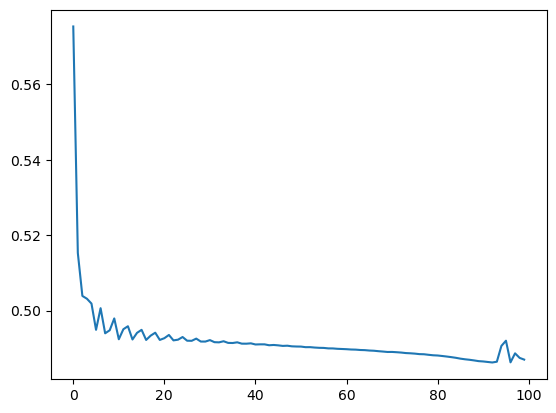

In [42]:
import matplotlib.pyplot as plt

plt.plot(loss_values)

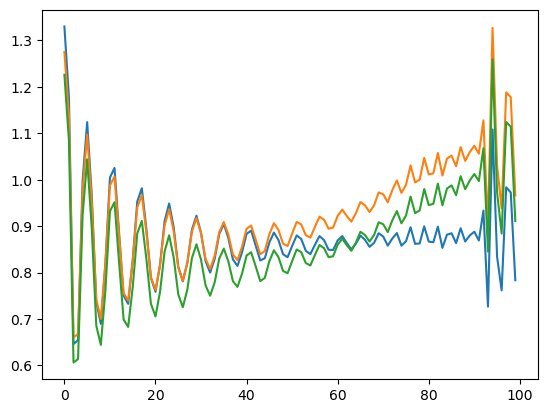

In [43]:
plt.plot(train_rmse_values, label="train")
plt.plot(val_rmse_values, label="val")
plt.plot(test_rmse_values, label="test")

### 7. Evaluate the learned node embeddings

In [44]:
model.eval() 

with torch.no_grad():
    # Pass the graph data through the encoder to get node embeddings
    node_embeddings = model.encoder(test_data.x_dict, test_data.edge_index_dict)

In [45]:
node_embeddings["gene"].size()

torch.Size([6838, 32])

In [46]:
node_embeddings["transcription factor"].size()

torch.Size([267, 32])

In [47]:
embeddings_gene = node_embeddings["gene"]
embeddigs_tf = node_embeddings["transcription factor"]

all_embeddings = torch.cat([embeddings_gene, embeddigs_tf], dim=0)

In [48]:
all_embeddings.size()

torch.Size([7105, 32])

In [49]:
colors = ['blue'] * len(embeddings_gene) + ['red'] * len(embeddigs_tf)

In [50]:
from sklearn.manifold import TSNE

z = TSNE(n_components=2).fit_transform(all_embeddings.detach().numpy())

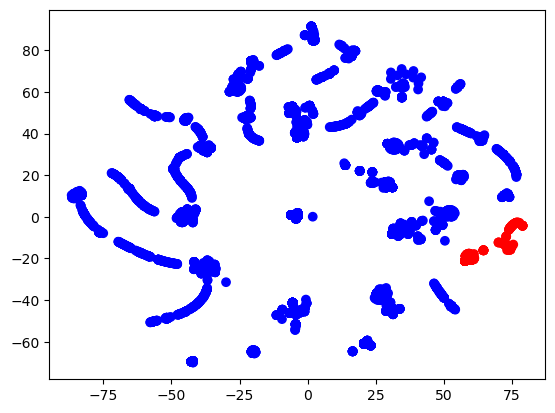

In [51]:
plt.scatter(z[:, 0], z[:, 1], c=colors)

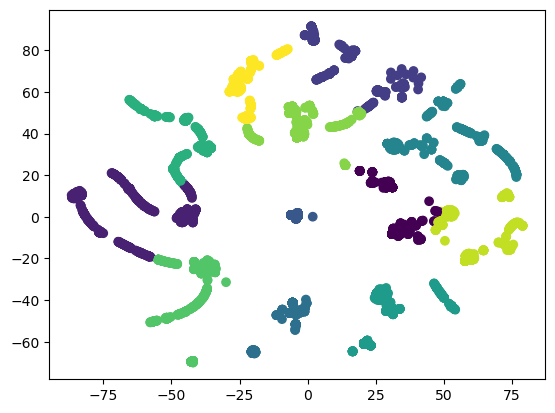

In [127]:
from sklearn.cluster import KMeans
clusters = 12
kmeans = KMeans(n_clusters=clusters, random_state=0).fit(z)
kmeans.labels_
plt.scatter(z[:, 0], z[:, 1], c=kmeans.labels_)

In [128]:
# get items of one cluster

all_cluster_indices = []
smallest = 10000
smalles_index = None
for cluster_index in range(kmeans.n_clusters):
    cluster_indices = [i for i, label in enumerate(kmeans.labels_) if label == cluster_index]
    if len(cluster_indices) < smallest:
        smallest = len(cluster_indices)
        smalles_index = cluster_index
    all_cluster_indices.append(cluster_indices)

In [129]:
# get the cluster with the fewest elements from all_cluster_indices
small_sample = all_cluster_indices[smalles_index]

In [130]:
# get gene names
# random link split only splits the edges into train, val, test -> we can use the initial mappign to ge the node names
all_node_names = list(all_nodes_mapping)
# use list of cluster_indices to get the items with these indices from all_node_names
gene_names = [all_node_names[i] for i in small_sample]
gene_names

['hgnc.symbol:CYP1B1',
 'hgnc.symbol:INHA',
 'hgnc.symbol:RBL1',
 'hgnc.symbol:IRF8',
 'hgnc.symbol:CHKA',
 'hgnc.symbol:STUB1',
 'hgnc.symbol:BTG2',
 'hgnc.symbol:TPO',
 'hgnc.symbol:ALDH3A1',
 'hgnc.symbol:GABRA6',
 'hgnc.symbol:MYH10',
 'hgnc.symbol:RAG2',
 'hgnc.symbol:TFRC',
 'hgnc.symbol:SYK',
 'hgnc.symbol:MXD1',
 'hgnc.symbol:ITGB2',
 'hgnc.symbol:LGALS3',
 'hgnc.symbol:SCG2',
 'hgnc.symbol:CD19',
 'hgnc.symbol:LCP1',
 'hgnc.symbol:KLF12',
 'hgnc.symbol:LTA',
 'hgnc.symbol:XPO1',
 'hgnc.symbol:CENPX',
 'hgnc.symbol:CEBPZ',
 'hgnc.symbol:MAPKAPK2',
 'hgnc.symbol:CEBPD',
 'hgnc.symbol:ATP1B1',
 'hgnc.symbol:CPT1B',
 'hgnc.symbol:ALG3',
 'hgnc.symbol:PTCRA',
 'hgnc.symbol:PSMC6',
 'hgnc.symbol:POLB',
 'hgnc.symbol:RAX',
 'hgnc.symbol:AQP3',
 'hgnc.symbol:IL12A',
 'hgnc.symbol:ATP7A',
 'hgnc.symbol:CYCS',
 'hgnc.symbol:ZNF148',
 'hgnc.symbol:NCOA3',
 'hgnc.symbol:ADA',
 'hgnc.symbol:COL3A1',
 'hgnc.symbol:IFNGR1',
 'hgnc.symbol:KLF13',
 'hgnc.symbol:VWF',
 'hgnc.symbol:HIPK2',
 'hg

In [131]:
# remove hgnc:symbol: from all items in gene_names
gene_list = [gene_name.replace("hgnc.symbol:", "") for gene_name in gene_names]
len(gene_list)

290

Not sure if the following makes sense. 
Just wanted to analyze if the gene clusters from the node embeddings represent something relevant (e.g. functional groups). -> not yet thoroughly evaluated

In [132]:
import gseapy as gp

# Enrichr library
library = "KEGG_2021_Human"

# Run GSEApy Enrichr
enr = gp.enrichr(gene_list=gene_list, gene_sets=library, outdir=None) # description='test'
results = enr.results

# Display the results
print(results.head())


          Gene_set                                     Term Overlap   P-value  \
0  KEGG_2021_Human                 ECM-receptor interaction    8/88  0.000042   
1  KEGG_2021_Human  Human T-cell leukemia virus 1 infection  12/219  0.000090   
2  KEGG_2021_Human         Protein digestion and absorption   8/103  0.000128   
3  KEGG_2021_Human               PI3K-Akt signaling pathway  15/354  0.000221   
4  KEGG_2021_Human                                Apoptosis   9/142  0.000233   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.010698            0                     0    6.960993   
1          0.010811            0                     0    4.066938   
2          0.010811            0                     0    5.857409   
3          0.010811            0                     0    3.116814   
4          0.010811            0                     0    4.714446   

   Combined Score                                              Genes  
0       70.186928    

In [133]:
results["number_of_genes"] = results['Genes'].apply(lambda x: len(x.split(';')))

In [134]:
results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,number_of_genes
0,KEGG_2021_Human,ECM-receptor interaction,8/88,0.000042,0.010698,0,0,6.960993,70.186928,VWF;ITGA3;COL4A1;COL6A1;ITGA11;ITGA7;HMMR;GP6,8
1,KEGG_2021_Human,Human T-cell leukemia virus 1 infection,12/219,0.000090,0.010811,0,0,4.066938,37.899944,POLB;NRAS;ZFP36;XPO1;CDKN2C;CREB3L3;KAT5;CHUK;...,12
2,KEGG_2021_Human,Protein digestion and absorption,8/103,0.000128,0.010811,0,0,5.857409,52.493620,SLC9A3;COL3A1;COL4A1;COL6A1;COL10A1;SLC1A5;ATP...,8
3,KEGG_2021_Human,PI3K-Akt signaling pathway,15/354,0.000221,0.010811,0,0,3.116814,26.238200,SYK;VWF;CHUK;ITGA3;CSH1;CASP9;NRAS;BCL2L11;CRE...,15
4,KEGG_2021_Human,Apoptosis,9/142,0.000233,0.010811,0,0,4.714446,39.443688,CASP9;NRAS;BCL2L11;CHUK;CTSL;CYCS;TNFRSF10A;CT...,9
...,...,...,...,...,...,...,...,...,...,...,...
251,KEGG_2021_Human,Insulin signaling pathway,1/137,0.865732,0.879474,0,0,0.498015,0.071804,NRAS,1
252,KEGG_2021_Human,Retrograde endocannabinoid signaling,1/148,0.885793,0.896106,0,0,0.460490,0.055845,GABRA6,1
253,KEGG_2021_Human,Spliceosome,1/150,0.889105,0.896106,0,0,0.454263,0.053394,TRA2B,1
254,KEGG_2021_Human,Oxytocin signaling pathway,1/154,0.895445,0.898957,0,0,0.442296,0.048845,NRAS,1
